In [375]:
import pandas as pd

### Task 1. Create a function that takes the address of a folder on disk as an argument and returns a dataframe with the following information about the images in the folder:
- file name;
- color model;
- format;
- the number of channels in the image;
- file size in megabytes, rounded to two decimal places;
- image width;
- picture height;
- full path to the file;
- reduced image. 

In [376]:
import os
import filetype
import base64
import random
from typing import List
from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [377]:
def get_images_from_dir(path: str) -> List[Image.Image]:
    if (os.path.exists(path) and os.path.isdir(path)):
        result = []
        for file in os.listdir(path):
            fullpath = os.path.join(path, file)
            if (filetype.is_image(fullpath)):
                result.append(Image.open(fullpath))
        return result
    raise ValueError('Invalid directory path')

In [378]:
def images_to_dataframe(path: str) -> pd.DataFrame:
    images = get_images_from_dir(path)
    dict = {'name': [], 'color model': [], 'format': [], 'channels': [], 'size': [], 'width': [], 'height': [], 'full path': [], 'image': [] }

    for img in images:
        dict['name'].append(img.filename)
        dict['color model'].append(img.mode)
        dict['format'].append(img.format)
        dict['channels'].append(len(img.getbands()))
        dict['size'].append(os.stat(img.filename).st_size)
        dict['width'].append(img.width)
        dict['height'].append(img.height)
        dict['full path'].append(img.filename)
        dict['image'].append(img.filename)
    return pd.DataFrame(dict)

In [379]:
def get_thumbnail(path: str) -> Image.Image:
    img = Image.open(path)

    if img.mode in ['CMYK']:
        img = img.convert('RGB')

    img.thumbnail((150, 150), Image.LANCZOS)
    return img

def image_base64(img: str) -> str:
    img = get_thumbnail(img)

    with BytesIO() as buffer:
        img.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(img: str) -> str:
    return f'<img src="data:image/png;base64,{image_base64(img)}">'


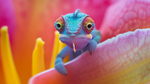
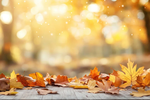
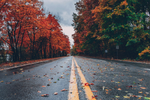
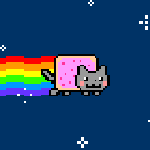
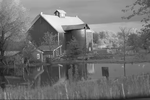
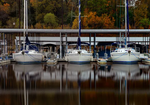
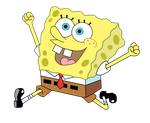
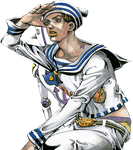
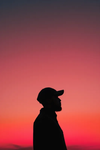

In [380]:
df = images_to_dataframe(r'C:\Users\User-PC\Desktop\PythonDataAnalysis\Lab5\images')
HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

### Task 2. Create a function that accepts as an argument:

- the path to the folder;
- the name of the source image;
- the number of images in a row;
- the number of images in a column


and returns the poster image.
Assume that the poster is rectangular and the number of pictures in the poster is a × b, where a is the number of columns and b is the number of rows.

In [381]:
def crop_to_square(img: Image.Image) -> Image.Image:
    width, height = img.size
    size = min(img.size)
    return img.crop(((width - size) / 2, (height - size) / 2, width - (width - size) / 2, height - (height - size) / 2) )

In [382]:
def get_random_images(images: List[Image.Image], n: int) -> List[Image.Image]:
    result = []
    for i in range(n):
        result.append(images[random.randint(0, len(images) - 1)])
    return result

In [383]:
def create_poster(path: str, filename: str, cols: int, rows: int) -> Image.Image:
    images = get_images_from_dir(path)
    images = [*map(crop_to_square, get_random_images(images, cols * rows))]
    size = min(img.width for img in images)
    images = [*map(lambda x: x.resize((size, size)), images)]
    
    poster = Image.new(mode='RGB', size=(size * cols, size * rows))

    for i in range(rows):
        for j in range(cols):
            poster.paste(images[i * cols + j], (j * size, i * size))
    poster.save(os.path.join('posters', filename))

    return poster

In [384]:
def apply_color_filter(img: Image.Image, c: str):
    width, heigth = img.size

    for x in range(width):
        for y in range(heigth):
            r, g, b = img.getpixel((x, y))
            r = r if c in ['r', 'p'] else 0
            g = g if c in ['g', 'p'] else 0
            img.putpixel(())

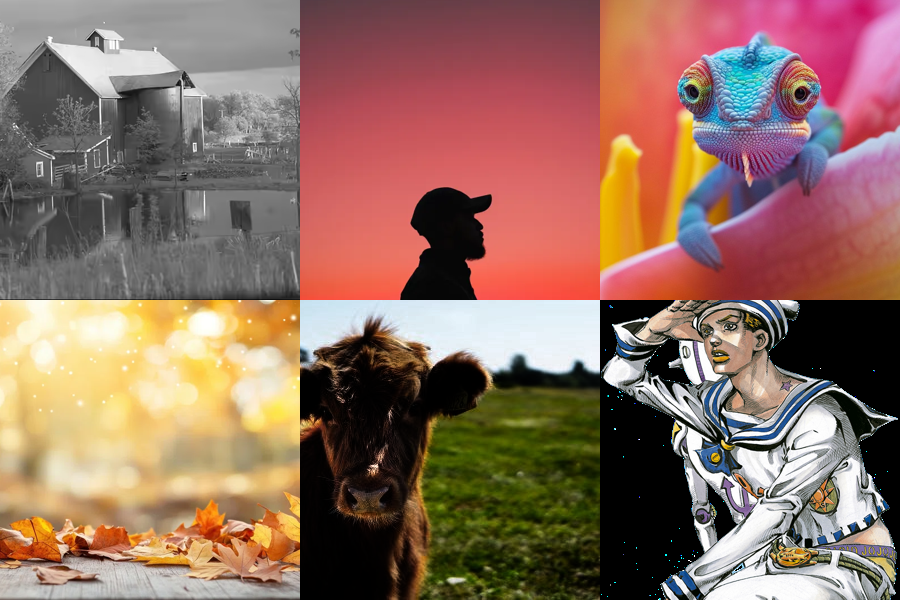

In [385]:
create_poster(r'C:\Users\User-PC\Desktop\PythonDataAnalysis\Lab5\images', 'poster.png', 3, 2)

In [ ]:
create_poster(r'C:\Users\User-PC\Desktop\PythonDataAnalysis\Lab5\images', 'poster.png', 2, 2)